In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import math

In [2]:
def cplot(current_qubits, prb, qubo_prb):
    num = 4
    cmap=['#999999','#FFFF99','#CC99FF','#FF99FF','#99FF99','#99CCFF','#FFCCCC']
    fig = plt.figure()
    ax = plt.axes()
    #ax = fig.add_subplot(111)
    pcs = []
    for item in current_qubits:
        pcs.append(prb[qubo_prb[item][0]][qubo_prb[item][1]])
    #print("pcs:", pcs)
    for i in range(num*num):
        x = i%num
        y = 5-i//num
        tri = plt.Polygon(((x,y),(x,y+1),(x+1/2,y+1/2)),ec='#000000', fill=False)
        ax.add_patch(tri)
        tri = plt.Polygon(((x,y+1),(x+1,y+1),(x+1/2,y+1/2)),ec='#000000', fill=False)
        ax.add_patch(tri)
        tri = plt.Polygon(((x+1,y),(x+1,y+1),(x+1/2,y+1/2)),ec='#000000', fill=False)
        ax.add_patch(tri)
        tri = plt.Polygon(((x,y),(x+1,y),(x+1/2,y+1/2)),ec='#000000', fill=False)
        ax.add_patch(tri)

    tmp=[]  #同じ場所にあるピース発見用
    for i in range(len(pcs)):
        location = pcs[i][0]
        lcf = 0
        if len(np.where(np.array(tmp)==location)[0])>0: lcf = 1
        x = location%num
        y = 5-location//num
        for j in range(1, len(pcs[i])):
            if lcf==0: cc = cmap[pcs[i][j]]
            else: cc='#FF0000'
            if j==1:
                tri = plt.Polygon(((x,y),(x,y+1),(x+1/2,y+1/2)),fc=cc, fill=True)
            if j==2:
                tri = plt.Polygon(((x,y+1),(x+1,y+1),(x+1/2,y+1/2)),fc=cc, fill=True)
            if j==3:
                tri = plt.Polygon(((x+1,y),(x+1,y+1),(x+1/2,y+1/2)),fc=cc, fill=True)
            if j==4:
                tri = plt.Polygon(((x,y),(x+1,y),(x+1/2,y+1/2)),fc=cc, fill=True)
            ax.add_patch(tri)
            tmp.append(location)
        ax.text(x, y+0.8,str(qubo_prb[current_qubits[i]][0]),color='black')
    plt.axis('scaled')
    ax.set_aspect('equal')
    plt.show()
#cplot(current_qubits, prb, qubo_prb)

In [3]:
#正答の配列
#それぞれ左、上、右、下の順
pc = [
    [0,0,1,2],
    [1,0,4,3],
    [4,0,6,1],
    [6,0,0,3],
    [0,2,5,4],
    [5,3,2,6],
    [2,1,5,3],
    [5,3,0,6],
    [0,4,1,6],
    [1,6,4,5],
    [4,3,2,1],
    [2,6,0,4],
    [0,6,3,0],
    [3,5,2,0],
    [2,1,5,0],
    [5,4,0,0],
    ]

In [4]:
#テキトウに並べ替え
p = [
    [0,0,1,2],
    [0,0,3,6],
    [0,0,5,4],
    [0,0,6,3],
    [0,4,3,1],
    [0,6,1,4],
    [0,4,2,6],
    [0,3,5,2],
    [0,2,1,5],
    [0,6,5,3],
    [0,2,5,4],
    [0,4,1,6],
    [2,6,5,3],
    [1,5,3,2],
    [4,3,2,1],
    [5,1,6,4],
    ]

In [5]:
#回転したピースを作る
#最初の１個は固定にするので回転なし
pr = []
for i, item in enumerate(p):
    tmp = []
    for j in range(4):
        tmp2=[]
        tmp2.extend(item[j:])
        tmp2.extend(item[:j])
        f=1
        for item2 in tmp:
            #すでに同じものが含まれていたら追加しない
            if np.array_equal(tmp2, item2):
                f=0
                break
        if f==1:tmp.append(tmp2)
    pr.append(tmp)
for i in range(len(pr)):
    print("pr,i:",i, pr[i])

pr,i: 0 [[0, 0, 1, 2], [0, 1, 2, 0], [1, 2, 0, 0], [2, 0, 0, 1]]
pr,i: 1 [[0, 0, 3, 6], [0, 3, 6, 0], [3, 6, 0, 0], [6, 0, 0, 3]]
pr,i: 2 [[0, 0, 5, 4], [0, 5, 4, 0], [5, 4, 0, 0], [4, 0, 0, 5]]
pr,i: 3 [[0, 0, 6, 3], [0, 6, 3, 0], [6, 3, 0, 0], [3, 0, 0, 6]]
pr,i: 4 [[0, 4, 3, 1], [4, 3, 1, 0], [3, 1, 0, 4], [1, 0, 4, 3]]
pr,i: 5 [[0, 6, 1, 4], [6, 1, 4, 0], [1, 4, 0, 6], [4, 0, 6, 1]]
pr,i: 6 [[0, 4, 2, 6], [4, 2, 6, 0], [2, 6, 0, 4], [6, 0, 4, 2]]
pr,i: 7 [[0, 3, 5, 2], [3, 5, 2, 0], [5, 2, 0, 3], [2, 0, 3, 5]]
pr,i: 8 [[0, 2, 1, 5], [2, 1, 5, 0], [1, 5, 0, 2], [5, 0, 2, 1]]
pr,i: 9 [[0, 6, 5, 3], [6, 5, 3, 0], [5, 3, 0, 6], [3, 0, 6, 5]]
pr,i: 10 [[0, 2, 5, 4], [2, 5, 4, 0], [5, 4, 0, 2], [4, 0, 2, 5]]
pr,i: 11 [[0, 4, 1, 6], [4, 1, 6, 0], [1, 6, 0, 4], [6, 0, 4, 1]]
pr,i: 12 [[2, 6, 5, 3], [6, 5, 3, 2], [5, 3, 2, 6], [3, 2, 6, 5]]
pr,i: 13 [[1, 5, 3, 2], [5, 3, 2, 1], [3, 2, 1, 5], [2, 1, 5, 3]]
pr,i: 14 [[4, 3, 2, 1], [3, 2, 1, 4], [2, 1, 4, 3], [1, 4, 3, 2]]
pr,i: 15 [[5, 1, 6, 

In [6]:
#ボードの位置
# 00 01 02 03
# 04 05 06 07
# 08 09 10 11
# 12 13 14 15

In [7]:
def add_prb(prb, prb_qubo, qubo_prb, pi, location, pri):
    tmp = [location]
    tmp.extend(pri)
    prb[pi].append(tmp)
    prb_qubo[pi].append(len(qubo_prb))
    qubo_prb.append([pi, len(prb_qubo[pi])-1])

In [8]:
#１つのピースにつき、ピースの回転×場所分のQubitを用意する。
#配列にその情報を格納しておく。
#どのピースを, どの場所に、どの回転で
#0が２つある最初のピースは左上に固定
prb=[0]*len(p)
prb_qubo=[0]*len(p)
qubo_prb=[]

#0が２つある最初のピースを左上に固定
prb[0]=[]
prb_qubo[0]=[]
#prb[0].append([0,0,0,1,2])
#prb_qubo[0].append([0])
#qubo_prb.append([0,0])
add_prb(prb, prb_qubo, qubo_prb, 0, 0, p[0])
#qubo_counter = 1
for i in range(1, len(p)):
    prb[i]=[]
    prb_qubo[i]=[]
    #counter = 0
    num0=len(np.where(np.array(p[i])==0)[0])
    for j in range(len(pr[i])):
        location = -1
        #0が２つある他のピースは、残りの角３つのどこかに配置
        if num0==2:
            #３隅をループ。zipの２番目の引数は、どこが0になるか
            for k, gp in zip([3,12,15],[[1,2],[0,3],[2,3]]):
                #ボードの隅がグレーになっているものを選ぶ
                if pr[i][j][gp[0]]==0 and pr[i][j][gp[1]]==0:
                    add_prb(prb, prb_qubo, qubo_prb, i, k, pr[i][j])
        #0が1つあるものは、辺のどこかに配置
        elif num0==1:
            #辺上のセルをループ。zipの２番目の引数は、どこが0になるか
            for k, gp in zip([1,2,4,7,8,11,13,14],[1,1,0,2,0,2,3,3]):
                #辺の部分がグレーになっているものを選ぶ
                if pr[i][j][gp]==0:
                    add_prb(prb, prb_qubo, qubo_prb, i, k, pr[i][j])
        #それ以外のは、真ん中の4つにすべての回転で配置
        else:  
            for k in [5,6,9,10]:
                add_prb(prb, prb_qubo, qubo_prb, i, k, pr[i][j])
#print(prb)
print(prb_qubo)
#print(qubo_prb)
#print(len(prb))

[[0], [1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23, 24, 25], [26, 27, 28, 29, 30, 31, 32, 33], [34, 35, 36, 37, 38, 39, 40, 41], [42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57], [58, 59, 60, 61, 62, 63, 64, 65], [66, 67, 68, 69, 70, 71, 72, 73], [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105], [106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121], [122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]]


In [9]:
def get_samples(rx_value_part):
    qlen=len(rx_value_part)
    circuit = QuantumCircuit(qlen,qlen)
    for i in range(qlen):
        circuit.rx(math.pi*(rx_value_part[i]),i)
    #print(math.pi*(rx_value_part[i]))
    circuit.measure(range(qlen), range(qlen))
    simulator = Aer.get_backend('qasm_simulator')
    result=execute(circuit, backend=simulator, shots=1).result()
    counts=result.get_counts()
    #print(counts)
    a = [i for i in counts.keys()]
    a = [int(i) for i in a[0][::-1]]
    #print("rx_value_part:", rx_value_part)
    #print("a:", a)
    return a

In [10]:
def get_colormatch(prb1, prb2):
    if prb1[0]<=prb2[0]:
        prbmin, prbmax=prb1, prb2
    else:
        prbmin, prbmax=prb2, prb1
    #左右に並んでいる場合  #それぞれ左、上、右、下の順
    if prbmin[0]%4!=3 and prbmax[0] == prbmin[0]+1:
        if prbmin[3]!=prbmax[1]: return -1
        else: return 1
    #上下に並んでいる  
    if prbmin[0]<12 and prbmax[0] == prbmin[0]+4:
        if prbmin[4]!=prbmax[2]: return -1
        return 1
    return 0
print(get_colormatch([10,1,4,1,7], [11,5,1,3,4]))

-1


In [11]:
#あってるかどうかを評価する関数
def get_penalty2(result, answer):
    result_pieces=[]
    result_qubit_ids=[]
    for i in range(qlen):
        if result[i]==1:
            #print(prb[qubo_prb[i][0]][qubo_prb[i][1]])
            result_pieces.append(prb[qubo_prb[i][0]][qubo_prb[i][1]])
            result_qubit_ids.append(i)
            
    penalty1 = np.zeros(qlen)
    penalty2 = np.zeros(qlen)
    penalty3 = np.zeros(qlen)
    
    #ボード上の1か所には１つしか置かれていない
    for i in range(16):
        count_b = 0
        for j, item in enumerate(result_pieces):
            if item[0] == i:
                count_b+=1
        #print(count_b)
        if count_b==0:
            #penalty1+=1
            for prb_i, item1 in enumerate(prb):
                for prb_j, item2 in enumerate(item1):
                    #print(item2)
                    if item2[0]==i:
                        #print("q:", prb_qubo[prb_i][prb_j])
                        penalty1[prb_qubo[prb_i][prb_j]]=0.1
        elif count_b>1:
            #penalty1+=count_b-1
            for j, item in enumerate(result_pieces):
                if item[0] == i:
                    penalty1[result_qubit_ids[j]]=-0.1
            
    #print("penalty1:", penalty1)

    #１つのピースは１つしか置かれていない
    #penalty2=0
    for i in range(16):
        count_p=0
        for j, item in enumerate(np.array(qubo_prb)[answer]):
            if item[0]==i:
                count_p+=1
        if count_p==0:
            #penalty2+=1
            for j, item in enumerate(np.array(qubo_prb)[answer]):
                if item[0]==i:
                    penalty2[answer[j]]=0.1
        elif count_p>1:
            #penalty2+=count_p-1
            for j, item in enumerate(np.array(qubo_prb)[answer]):
                if item[0]==i:
                    penalty2[answer[j]]=-0.1
            
    #print("penalty2:", penalty2)
    
    #隣り合う色があっている
    #penalty3=0
    for i in range(len(result_pieces)):
        for j in range(i+1, len(result_pieces)):
            #print(result_pieces[i],result_pieces[j], get_colormatch(result_pieces[i],result_pieces[j]))
            #print(result_qubit_ids[j])
            p = get_colormatch(result_pieces[i],result_pieces[j])*(+0.02)
            if result_qubit_ids[i]>0: penalty3[result_qubit_ids[i]]+=p
            penalty3[result_qubit_ids[j]]+=p
    #print(penalty3)
    penalty=penalty1+penalty2+penalty3
    penalty_sum=np.sum(np.abs(penalty1))+np.sum(np.abs(penalty2))+np.sum(-1*penalty3)
    return penalty, penalty_sum
#penalty=get_penalty2(result, answer)

result: [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1]
penalty_sum: 29.060000000000002


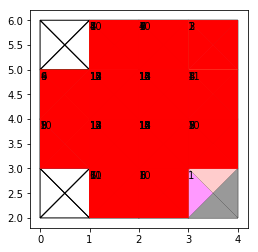

result: [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
penalty_sum: 15.66


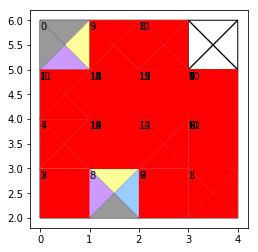

result: [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
penalty_sum: 7.619999999999999


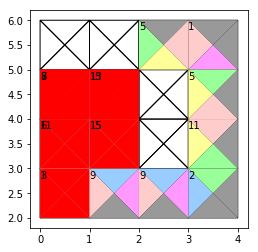

result: [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
penalty_sum: 5.08


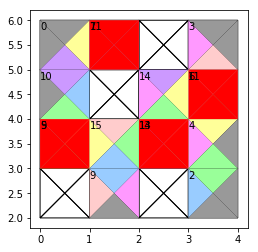

result: [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
penalty_sum: 5.04


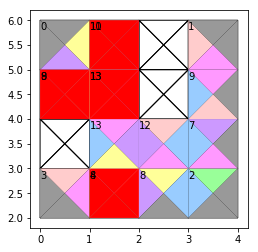

result: [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
penalty_sum: 4.2


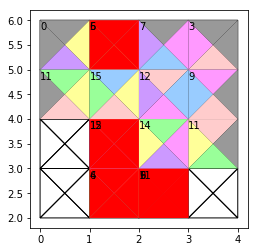

result: [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
penalty_sum: 4.12


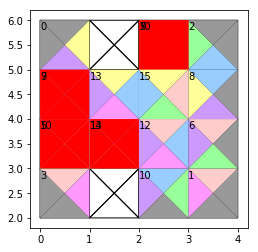

result: [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
penalty_sum: 3.7600000000000002


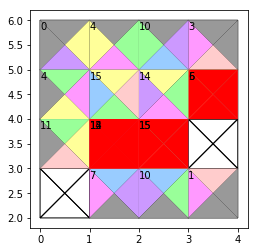

result: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
penalty_sum: 3.5000000000000004


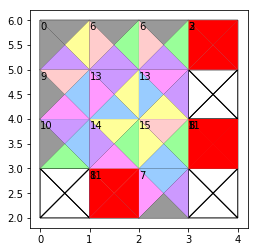

result: [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
penalty_sum: 3.4800000000000004


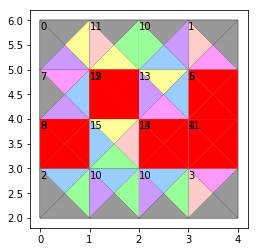

result: [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
penalty_sum: 3.46


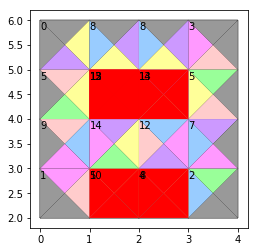

result: [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
penalty_sum: 3.12


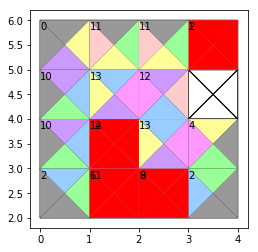

In [12]:
qlen=138
rx_values=(np.zeros(qlen)+0.5).tolist()
#rx_values=np.random.random_sample(qlen).tolist()
#rx_values_=[np.random.random_sample(qlen).tolist() for i in range(10)]
#rx_values = rx_values_[0]
min_penalty=100
for itr in range(1000):
    penalties=[]
    #for j, rx_values in enumerate(rx_values_):
    result = []
    #print("rx_values:", rx_values)
    for i in range(qlen//10+1):
        res = get_samples(rx_values[i*10:(i+1)*10])
        #print(res)
        result.extend(res)
    #print("len result:", len(result))
    answer = np.where(np.array(result)==1)[0]
    #print(answer)
    penalty, penalty_sum=get_penalty2(result, answer)
    #penalty_sum=np.sum(np.abs(penalty))
    if penalty_sum<min_penalty:
        min_penalty=penalty_sum
        print("result:",result)
        print("penalty_sum:",penalty_sum)
        cplot(answer, prb, qubo_prb)    
    rx_values=rx_values+penalty
    for i in range(qlen):
        if rx_values[i]<0:rx_values[i]=0 
        elif rx_values[i]>1:rx_values[i]=1 


In [41]:
print(prb)
print(prb_qubo)

[[[0, 0, 0, 1, 2]], [[12, 0, 3, 6, 0], [15, 3, 6, 0, 0], [3, 6, 0, 0, 3]], [[12, 0, 5, 4, 0], [15, 5, 4, 0, 0], [3, 4, 0, 0, 5]], [[12, 0, 6, 3, 0], [15, 6, 3, 0, 0], [3, 3, 0, 0, 6]], [[4, 0, 4, 3, 1], [8, 0, 4, 3, 1], [13, 4, 3, 1, 0], [14, 4, 3, 1, 0], [7, 3, 1, 0, 4], [11, 3, 1, 0, 4], [1, 1, 0, 4, 3], [2, 1, 0, 4, 3]], [[4, 0, 6, 1, 4], [8, 0, 6, 1, 4], [13, 6, 1, 4, 0], [14, 6, 1, 4, 0], [7, 1, 4, 0, 6], [11, 1, 4, 0, 6], [1, 4, 0, 6, 1], [2, 4, 0, 6, 1]], [[4, 0, 4, 2, 6], [8, 0, 4, 2, 6], [13, 4, 2, 6, 0], [14, 4, 2, 6, 0], [7, 2, 6, 0, 4], [11, 2, 6, 0, 4], [1, 6, 0, 4, 2], [2, 6, 0, 4, 2]], [[4, 0, 3, 5, 2], [8, 0, 3, 5, 2], [13, 3, 5, 2, 0], [14, 3, 5, 2, 0], [7, 5, 2, 0, 3], [11, 5, 2, 0, 3], [1, 2, 0, 3, 5], [2, 2, 0, 3, 5]], [[4, 0, 2, 1, 5], [8, 0, 2, 1, 5], [13, 2, 1, 5, 0], [14, 2, 1, 5, 0], [7, 1, 5, 0, 2], [11, 1, 5, 0, 2], [1, 5, 0, 2, 1], [2, 5, 0, 2, 1]], [[4, 0, 6, 5, 3], [8, 0, 6, 5, 3], [13, 6, 5, 3, 0], [14, 6, 5, 3, 0], [7, 5, 3, 0, 6], [11, 5, 3, 0, 6], [1, 